In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Loading dataset
data = pd.read_csv("Synthetic_Financial.csv")

<ipython-input-3-820730d62db6>:2: DtypeWarning: Columns (1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Synthetic_Financial.csv")


In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1048557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 1. Exploratory Data Analysis
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048562 entries, 0 to 1048561
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            54341 non-null  float64
 1   type            54341 non-null  object 
 2   amount          54341 non-null  float64
 3   nameOrig        54341 non-null  object 
 4   oldbalanceOrg   54341 non-null  float64
 5   newbalanceOrig  54341 non-null  float64
 6   nameDest        54341 non-null  object 
 7   oldbalanceDest  54341 non-null  float64
 8   newbalanceDest  54341 non-null  float64
 9   isFraud         54341 non-null  float64
 10  isFlaggedFraud  54341 non-null  float64
dtypes: float64(8), object(3)
memory usage: 88.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  54341.000000  5.434100e+04   5.434100e+04    5.434100e+04   
mean       7.577317  1.588220e+05   7.237885e+05    7.378022e+05   
std        2.016825  3.279869e+05   2.17

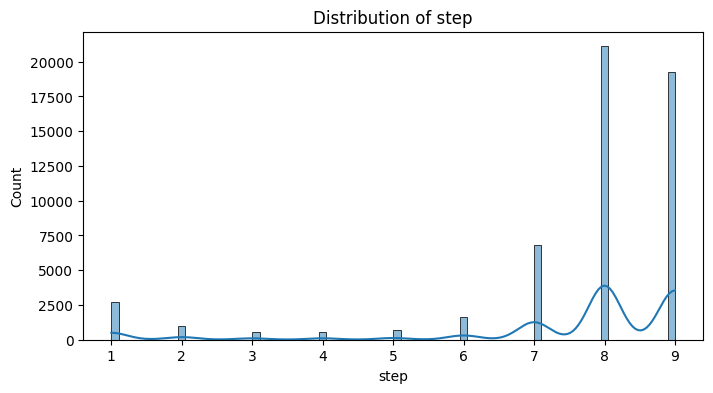

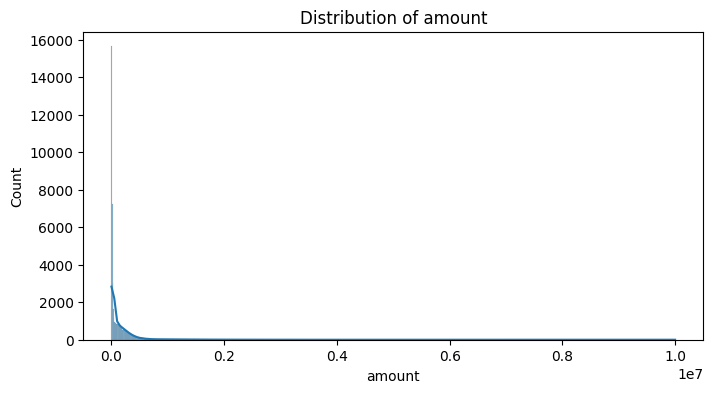

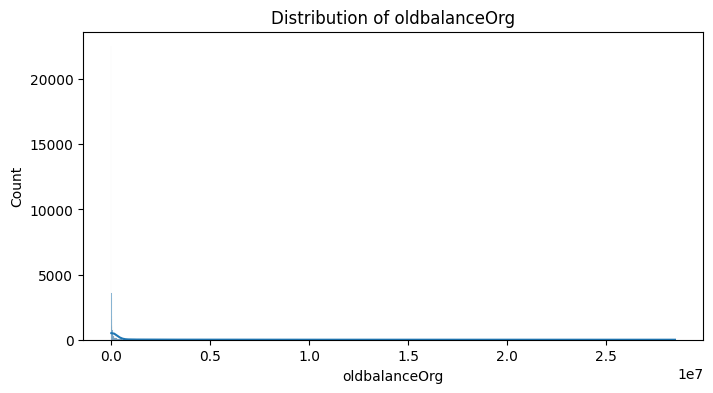

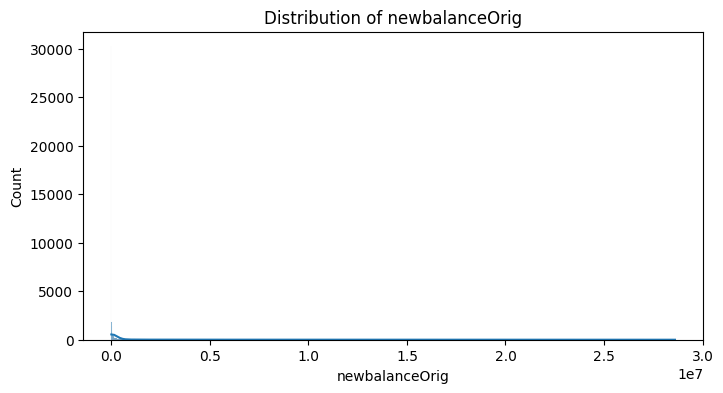

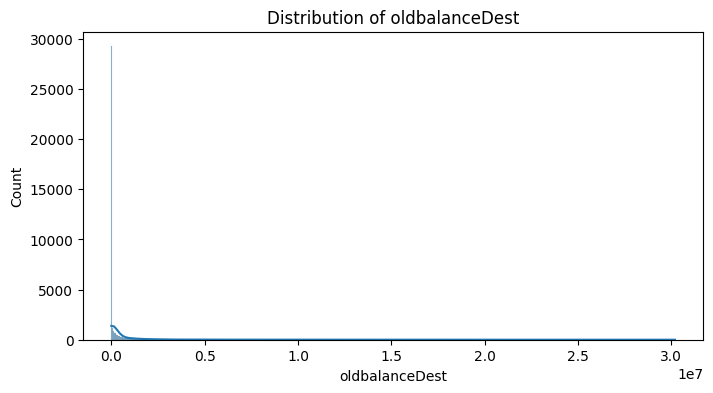

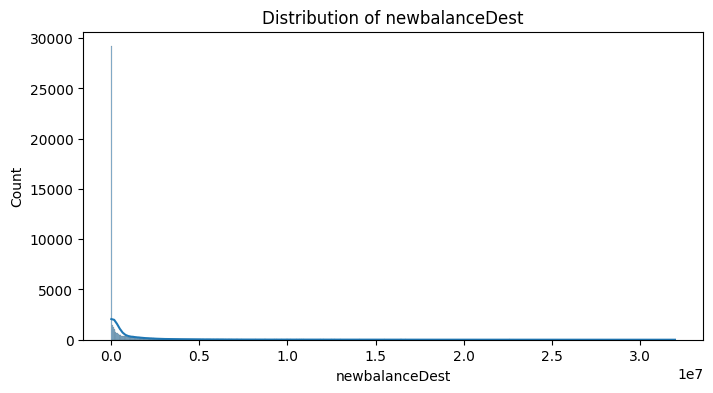

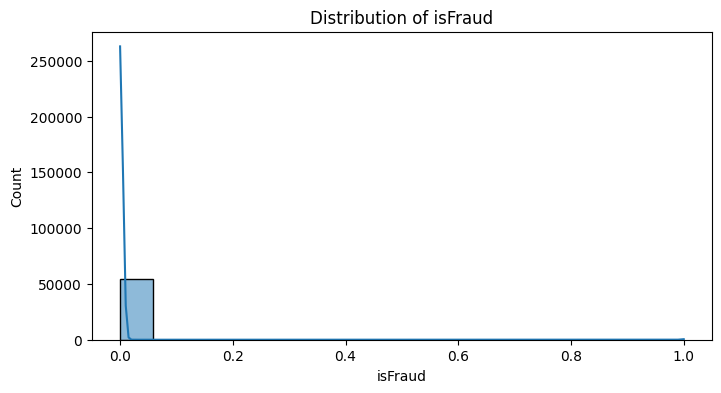

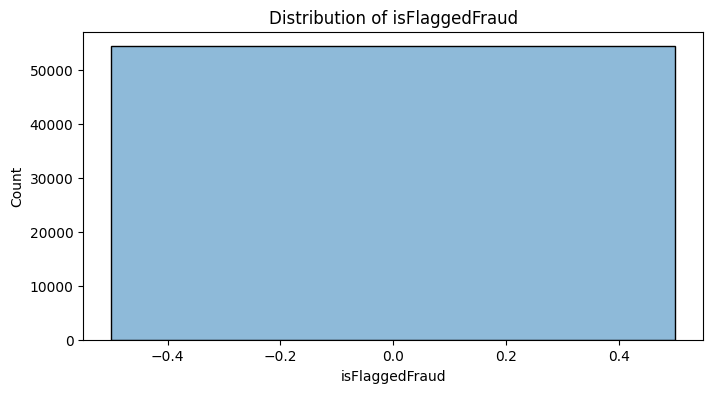

In [6]:
# Visualize distributions of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [8]:
# 2. Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])


In [9]:
# Drop irrelevant columns
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [22]:
# Drop rows with missing values (if any) in the target variable (y) and features (X)
data.dropna(subset=['isFraud'], inplace=True)

In [23]:
# Standardize numerical features
scaler = StandardScaler()
data[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount']] = scaler.fit_transform(
    data[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount']]
)


In [24]:
# Separate features and target
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [25]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=20; total time=   0.4s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=30; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=30; total time=   0.7s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=30; total time=   1.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END .max_depth=10, min_samples_split=5, n_e

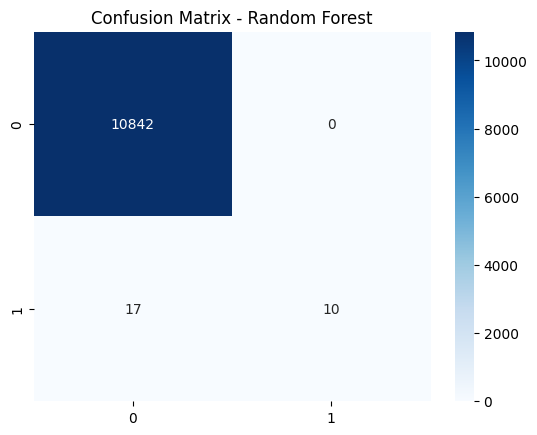

Random Forest AUC Score: 0.9975335970539808


In [42]:
# 2. Machine Learning - Random Forest
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
rf_preds = best_rf_model.predict(X_test)
rf_proba = best_rf_model.predict_proba(X_test)[:, 1]
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# Random Forest Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Random Forest AUC Score
rf_auc = roc_auc_score(y_test, rf_proba)
print(f"Random Forest AUC Score: {rf_auc}")

In [43]:
# 3. Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
nn_history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, callbacks=[early_stopping], verbose=2)

nn_preds = (nn_model.predict(X_test) > 0.5).astype("int32")
nn_proba = nn_model.predict(X_test).ravel()
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_preds))

# Neural Network AUC Score
nn_auc = roc_auc_score(y_test, nn_proba)
print(f"Neural Network AUC Score: {nn_auc}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 - 5s - 9ms/step - accuracy: 0.9982 - loss: 0.0165 - val_accuracy: 0.9985 - val_loss: 0.0119
Epoch 2/10
544/544 - 4s - 8ms/step - accuracy: 0.9982 - loss: 0.0137 - val_accuracy: 0.9985 - val_loss: 0.0089
Epoch 3/10
544/544 - 2s - 5ms/step - accuracy: 0.9984 - loss: 0.0130 - val_accuracy: 0.9985 - val_loss: 0.0086
Epoch 4/10
544/544 - 2s - 5ms/step - accuracy: 0.9983 - loss: 0.0121 - val_accuracy: 0.9987 - val_loss: 0.0085
Epoch 5/10
544/544 - 2s - 4ms/step - accuracy: 0.9984 - loss: 0.0121 - val_accuracy: 0.9987 - val_loss: 0.0083
Epoch 6/10
544/544 - 3s - 6ms/step - accuracy: 0.9984 - loss: 0.0118 - val_accuracy: 0.9987 - val_loss: 0.0082
Epoch 7/10
544/544 - 2s - 4ms/step - accuracy: 0.9984 - loss: 0.0119 - val_accuracy: 0.9987 - val_loss: 0.0082
Epoch 8/10
544/544 - 2s - 4ms/step - accuracy: 0.9984 - loss: 0.0112 - val_accuracy: 0.9987 - val_loss: 0.0081
Epoch 9/10
544/544 - 2s - 4ms/step - accuracy: 0.9984 - loss: 0.0112 - val_accuracy: 0.9987 - val_loss: 0.0080
Epoch 10/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


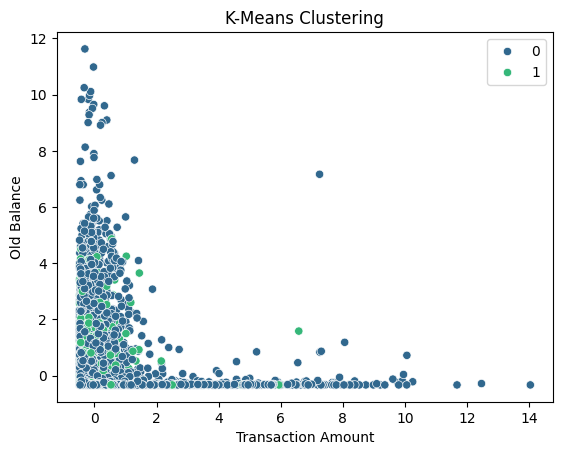

In [44]:
# 4. Novel Solution - Clustering (Unsupervised Learning)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
clusters = kmeans.predict(X_test)
sns.scatterplot(x=X_test['amount'], y=X_test['oldbalanceOrg'], hue=clusters, palette='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Transaction Amount")
plt.ylabel("Old Balance")
plt.show()


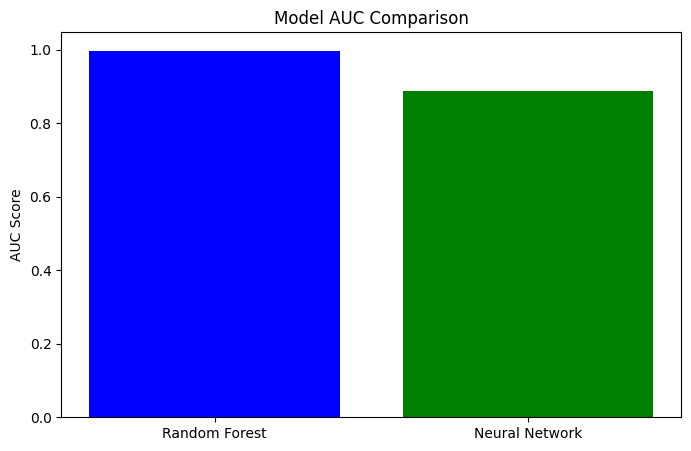

In [45]:
# 5. Advanced Visualization - Model Comparison
models = ['Random Forest', 'Neural Network']
auc_scores = [rf_auc, nn_auc]

plt.figure(figsize=(8, 5))
plt.bar(models, auc_scores, color=['blue', 'green'])
plt.title("Model AUC Comparison")
plt.ylabel("AUC Score")
plt.show()